In [36]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import vice

import sys
sys.path.append("../..")

In [32]:
import surp.analysis_scripts.rc_params
import surp.analysis_scripts.gas_phase_data as gap
import surp.analysis_scripts.plotting_utils as pluto
import surp.analysis_scripts.apogee_analysis as aah
from surp .analysis_scripts.vice_model import vice_model

In [3]:
berg19 = pd.read_csv("../data/berg19.csv")

In [29]:
berg19 = berg19.iloc[:-1]

In [57]:
cooke17 = pd.read_csv("../data/cooke17.csv")

Text(0, 0.5, 'log C/O')

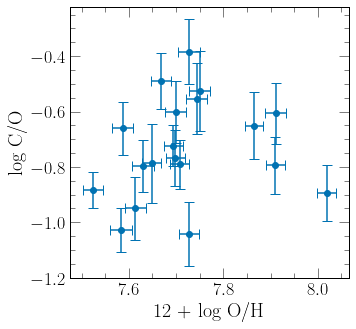

In [30]:
plt.errorbar(berg19.eps_o, berg19.log_c_o, xerr=berg19.eps_o_err, yerr=berg19.log_c_o_err, fmt="o")
plt.xlabel("12 + log O/H")
plt.ylabel("log C/O")

<ErrorbarContainer object of 3 artists>

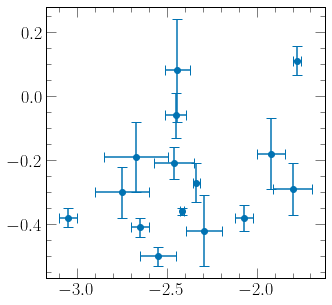

In [58]:
plt.errorbar(cooke17.o_h, cooke17.c_o, xerr=cooke17.o_h_err, yerr=cooke17.c_o_err, fmt="o")

In [16]:
berg19["[c/o]"] = berg19.log_c_o + np.log10(12/16) - np.log10(vice.solar_z("c")/vice.solar_z("o"))
berg19["[o/h]"] = berg19.eps_o + np.log10(16) - np.log10(vice.solar_z("o")) - 12

In [27]:
fiducial = vice_model("../output/cristallo11_f0.2_Z0.4_eta1.0_v0.1.3_lateburst.json")

/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
../../surp/analysis_scripts/plotting_utils.py:247: RuntimeWarning: invalid value encountered in true_divide
  dy = std / np.sqrt(nums)


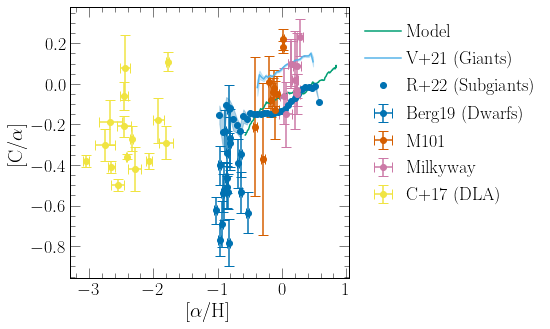

In [60]:
plt.errorbar(berg19["[o/h]"], berg19["[c/o]"], xerr=berg19.eps_o_err, yerr=berg19.log_c_o_err, fmt="o", label="Berg19 (Dwarfs)")

fiducial.plot_gas("[o/h]", "[c/o]", label="Model")
# gap.plot_all("[o/h]", "[c/o]")

plt.errorbar(cooke17.o_h, cooke17.c_o, xerr=cooke17.o_h_err, yerr=cooke17.c_o_err, fmt="o", label="C+17 (DLA)")

df = aah.vincenzo2021()
pluto.plot_mean_track(df["[o/h]"], df["[c/o]"], xlim=(-0.4, 0.6), label="V+21 (Giants)", shade_width=True, err_mean=True)

subgiants = aah.subgiants
filt = ~np.isnan(subgiants["C_MG"])
filt &+ ~np.isnan(subgiants["MG_H"])
df = subgiants[filt]
pluto.plot_mean_track(df["MG_H"], df["C_MG"], xlim=(-1, 0.6), label="R+22 (Subgiants)", shade_width=True, err_mean=True)

plt.xlabel(r"[$\alpha$/H]")
plt.ylabel(r"[C/$\alpha$]")
pluto.legend_outside()